# Car values from numberplate 

**Choose system** | windows = true, mac = false | 

**Choose car** | You can pick between "Aygo" or "Tesla" for now |



In [1]:
on_windows = False 
car_model = "Aygo"
from matplotlib import pyplot as plt

#### Picture of the cars to choose from

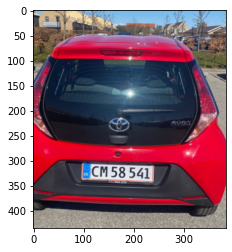

In [2]:
import matplotlib.image as mpimg
img = mpimg.imread('./images/aygo.png')
imgplot = plt.imshow(img)
plt.show()

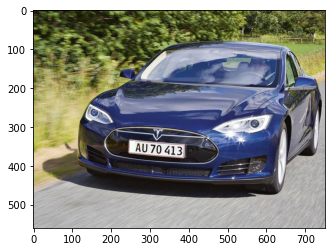

In [3]:
img2 = mpimg.imread('./images/tesla.jpg')
imgplot = plt.imshow(img2)
plt.show()

### Find numberplate

Nummerpladen er: CM58 541



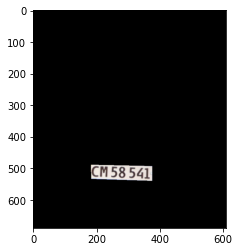

In [4]:
from modules import photohandling as ph

numberplate = ph.find_numberplate(on_windows, car_model)

### Scrape web data from nummerplade.net

In [5]:
import modules.nummerplade_scraper as np_scraper
search_car = np_scraper.numberplate_scraper(numberplate, on_windows)

search_car_km = search_car.get_car_km()
search_car_make_model = search_car.get_car_make_model()
search_car_year = search_car.get_car_model_year()


print("Search_car_km: " + search_car_km)
print("Search_car_year: " + search_car_year)
print("Mærke/model på søgte bil: ", search_car_make_model)

search_car.close_browser()

Starting up..
Got Browser
Search Entered
Search done
Search_car_km: 93000
Search_car_year: 2015 
Mærke/model på søgte bil:  Toyota Aygo 


### Scrape web data from Bilbasen.dk

In [6]:
import modules.bilbasen_scraper as bilbasen_scraper

bilbasen = bilbasen_scraper.my_car(on_windows)
bilbasen.click_cookie_button()
bilbasen.click_leasing_button()
bilbasen.search_in_search_bar(search_car_make_model)
print("Searching for: " + search_car_make_model)
bilbasen.get_car_list()
bilbasen.close_browser()
make_me_dataframe = bilbasen.car_list


Starting up...
Got Browser
Cookie Button Clicked
Leasing Button Clicked
Search Bar Entered
Searching for: Toyota Aygo 
Souping Site

Cars found: 31
{'name': 'Toyota Aygo 1,0 VVT-i x-cite 5d', 'km': 40000, 'price': '79500', 'year': 2015}
{'name': 'Toyota Aygo 1,0 Plus 5d', 'km': 144000, 'price': '29900', 'year': 2008}
{'name': 'Toyota Aygo 1,0 VVT-i x-style 5d', 'km': 10000, 'price': '104900', 'year': 2019}
{'name': 'Toyota Aygo 1,0 VVT-i x-wave Sky 5d', 'km': 107000, 'price': '69900', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i T2 5d', 'km': 91000, 'price': '39990', 'year': 2012}
{'name': 'Toyota Aygo 1,0 VVT-i x-touch 5d', 'km': 155000, 'price': '62500', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-clusiv 5d', 'km': 109000, 'price': '69800', 'year': 2015}
{'name': 'Toyota Aygo 1,0 Plus MMT 5d', 'km': 220000, 'price': '29900', 'year': 2007}
{'name': 'Toyota Aygo 1,0 VVT-i x-press 5d', 'km': 6900, 'price': '102900', 'year': 2020}
{'name': 'Toyota Aygo 1,0 VVT-i x-style 5d', 'km': 6

### Machine learning 

In [7]:

import modules.regression as regression
import pandas as pd

data = pd.DataFrame(make_me_dataframe) 
data.head()



,name,km,price,year
0,"Toyota Aygo 1,0 VVT-i x-cite 5d",40000,79500,2015
1,"Toyota Aygo 1,0 Plus 5d",144000,29900,2008
2,"Toyota Aygo 1,0 VVT-i x-style 5d",10000,104900,2019
3,"Toyota Aygo 1,0 VVT-i x-wave Sky 5d",107000,69900,2015
4,"Toyota Aygo 1,0 VVT-i T2 5d",91000,39990,2012


##### Create instance of the regression class

In [8]:
find_car = regression.find_car_value(
    data, search_car_km, search_car_year)

#### Validate that we get data from dataframe

In [9]:
find_car.show_dataframe()

,name,km,price,year
0,"Toyota Aygo 1,0 VVT-i x-cite 5d",40000,79500,2015
1,"Toyota Aygo 1,0 Plus 5d",144000,29900,2008
2,"Toyota Aygo 1,0 VVT-i x-style 5d",10000,104900,2019
3,"Toyota Aygo 1,0 VVT-i x-wave Sky 5d",107000,69900,2015
4,"Toyota Aygo 1,0 VVT-i T2 5d",91000,39990,2012


#### Normalizing the data 

In [10]:
scaled_df = find_car.normalize_data()

#### Data visualization with normalized data

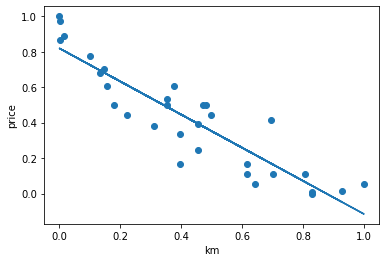

In [11]:
from matplotlib import pyplot as plt
import numpy as np

x1 = scaled_df['km']
y = scaled_df['price']

plt.scatter(x1, y)
plt.xlabel("km")
plt.ylabel("price")

# m = slope, b = intercept 
m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+ b)

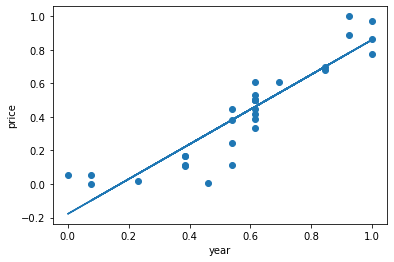

In [12]:
x2 = scaled_df['year']
y = scaled_df['price']

plt.scatter(x2, y)
plt.xlabel("year")
plt.ylabel("price")

m, b = np.polyfit(x2, y, 1)
plt.plot(x2, m*x2+b)

#### Describing the data to get an idea of the values 

In [13]:
find_car.describe_data()


,km,year
count,31.000000,31.000000
mean,97274.193548,2014.516129
std,61868.683342,3.414391
min,6500.000000,2007.000000
25%,42400.000000,2012.500000
50%,91000.000000,2015.000000
75%,141000.000000,2015.500000
max,220000.000000,2020.000000


#### Trains the model using the data fetched 

In [14]:
find_car.train_model()


(       km  year
 2   10000  2019
 29  87000  2016
 13  28000  2020
 10  54000  2014
 27  81700  2015
 25  82000  2015
 22  73000  2014,
 2     104900
 29     79500
 13     94800
 10     64980
 27     72900
 25     69900
 22     59000
 Name: price, dtype: object)

#### Finding slope and interception | Used for data visualization

In [15]:
coeff_df, intercept = find_car.show_coff_and_interception()


Using the coeff and the interception given by the linear regression model to do the graph.
Then we combine the two coefficents and plot the data.

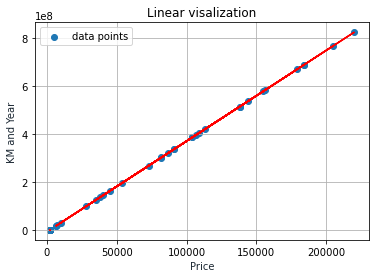

In [16]:
x = find_car.X

km_coeff = int(coeff_df.iloc[0])
year_coeff = int(coeff_df.iloc[1])

slope = (km_coeff) + (year_coeff)
y = slope*x+intercept

plt.plot(x, y, "red")
plt.scatter(x,y, label="data points")
plt.title('Linear visalization')
plt.xlabel('Price', color='#1C2833')
plt.ylabel('KM and Year', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Compare actual scraped values to the ones predicted by the model
The following piece of code compares how accurate the code is based on the metrics.score() function

In [17]:
find_car.prediction_vs_real()


,Actual,Predicted
2,104900,98362.504271
29,79500,70478.273608
13,94800,98280.249439
10,64980,69998.562010
27,72900,67833.325093
25,69900,67768.902967
22,59000,65918.494009


#### Accuracy of the algorithm

In [18]:
find_car.predict_data_accuracy()

Model accuracy: 89.50687174161847 %


#### Shows the predicted value of the entered car

In [19]:
find_car.predict_car_value()

Value of the entered car: 65406.75833519 kr
